<a href="https://colab.research.google.com/github/drscghosh/Testing/blob/master/CRD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

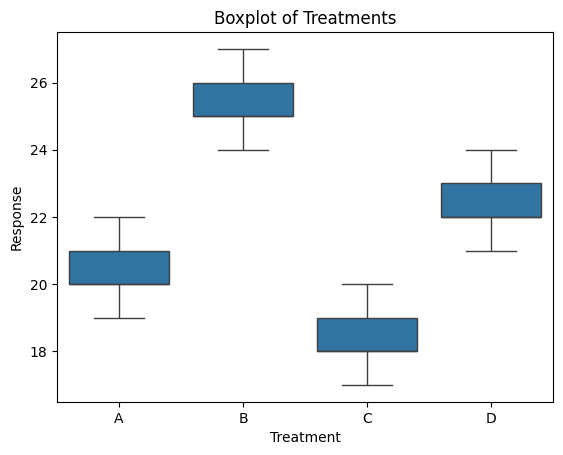


ANOVA Table:
              sum_sq    df          F        PR(>F)
C(Treatment)  133.75   3.0  34.294872  3.371493e-07
Residual       20.80  16.0        NaN           NaN

Tukey HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      5.0    0.0  2.9369  7.0631   True
     A      C     -2.0 0.0591 -4.0631  0.0631  False
     A      D      2.0 0.0591 -0.0631  4.0631  False
     B      C     -7.0    0.0 -9.0631 -4.9369   True
     B      D     -3.0 0.0037 -5.0631 -0.9369   True
     C      D      4.0 0.0002  1.9369  6.0631   True
----------------------------------------------------


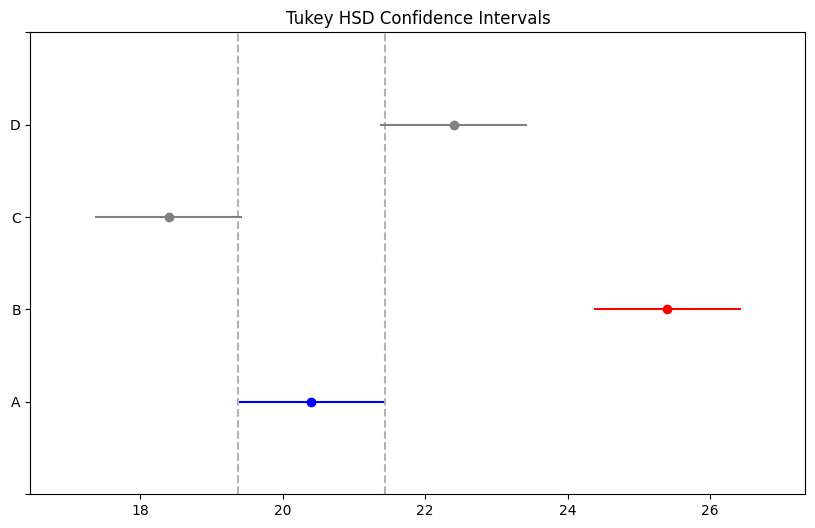

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Sample Dataset
# Suppose we have 4 treatments (A, B, C, D), each applied to 5 experimental units
data = {
    'Treatment': ['A']*5 + ['B']*5 + ['C']*5 + ['D']*5,
    'Response': [
        20, 21, 19, 22, 20,   # Treatment A
        25, 26, 27, 24, 25,   # Treatment B
        18, 17, 19, 20, 18,   # Treatment C
        22, 23, 24, 21, 22    # Treatment D
    ]
}

df = pd.DataFrame(data)

# 2. Visualize data
sns.boxplot(x='Treatment', y='Response', data=df)
plt.title('Boxplot of Treatments')
plt.show()

# 3. ANOVA using OLS model
model = ols('Response ~ C(Treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)

# 4. Tukey's HSD test for multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['Response'],
                          groups=df['Treatment'],
                          alpha=0.05)

print("\nTukey HSD Results:")
print(tukey)

# Optional: plot Tukey results
tukey.plot_simultaneous(comparison_name='A')
plt.title('Tukey HSD Confidence Intervals')
plt.show()

